# Compare accuracies

In [1]:
import os
import fnmatch
import pandas as pd
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from utils import isolate_int, flatten_2D_list
from data_extractor import output_vars_v4
import numpy as np
from copy import deepcopy

In [2]:
path = 'saved_models/'
model_prefixes = ['TEST9_global_v4_all_channels_depth_', 'TEST9_sel1_depth_', 'TEST9_sel2_depth_']
labels = ['All features', '29 best features', '40 best features']
val = pd.read_pickle('extracted_data/TEST9_global_v4_og_and_norm_weights_val')

In [3]:
vars_list = []

with open('saved_results/features_and_label_all_v4', 'rb') as file:
        vars_all_v4 = pickle.load(file)
vars_list.append(vars_all_v4)

with open('saved_results/features_and_label_sel1', 'rb') as file:
        vars_sel1 = pickle.load(file)
vars_list.append(vars_sel1)

with open('saved_results/features_and_label_sel2', 'rb') as file:
        vars_sel2 = pickle.load(file)
vars_list.append(vars_sel2)

In [4]:
model_names_list = []
depths_list = []
for model_prefix in model_prefixes:
    model_names = fnmatch.filter(os.listdir(path), model_prefix+'*')
    model_names_list.append(model_names)
    depths = []
    for name in model_names:
        depth = isolate_int(name, separators='_')[0]
        depths.append(depth)
    depths_list.append(depths)

In [5]:
def eval_accuracies(model_names, val, selected_vars):
    x_val = val[selected_vars]
    label_val = x_val.pop('signal_label').astype(float)
    weighted_accs = []
    for model_name in model_names:
        model = tf.keras.models.load_model(path+model_name)
        results = model.evaluate(x_val, label_val, sample_weight=val['weightNorm'])
        weighted_accs.append(results[-1])
    return weighted_accs


In [6]:
weighted_accs_list = []
for i, model_names in enumerate(model_names_list):
    weighted_accs = eval_accuracies(model_names, val, vars_list[i])
    weighted_accs_list.append(weighted_accs)

2023-05-29 18:04:57.289382: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 18:04:58.278613: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6673 MB memory:  -> device: 0, name: Quadro RTX 4000, pci bus id: 0000:17:00.0, compute capability: 7.5
2023-05-29 18:04:58.279388: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6653 MB memory:  -> device: 1, name: Quadro RTX 4000, pci bus id: 0000:65:00.0, compute capability: 7.5


6295/6295 [==============================] - 23s 4ms/step - loss: 0.1585 - accuracy: 0.6649 - weighted_accuracy: 0.9468


In [5]:
sizes_list = []
for model_names in model_names_list:
    sizes = []
    for model_name in model_names:
        model = tf.keras.models.load_model(path+model_name)
        sizes.append(model.count_params())
    sizes_list.append(sizes)

2023-06-07 18:21:52.141630: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 18:21:53.018627: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6673 MB memory:  -> device: 0, name: Quadro RTX 4000, pci bus id: 0000:17:00.0, compute capability: 7.5
2023-06-07 18:21:53.019342: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6654 MB memory:  -> device: 1, name: Quadro RTX 4000, pci bus id: 0000:65:00.0, compute capability: 7.5


In [7]:
print(model_names_list)

[['TEST9_global_v4_all_channels_depth_6', 'TEST9_global_v4_all_channels_depth_3', 'TEST9_global_v4_all_channels_depth_13', 'TEST9_global_v4_all_channels_depth_7', 'TEST9_global_v4_all_channels_depth_5', 'TEST9_global_v4_all_channels_depth_11', 'TEST9_global_v4_all_channels_depth_4', 'TEST9_global_v4_all_channels_depth_2', 'TEST9_global_v4_all_channels_depth_15', 'TEST9_global_v4_all_channels_depth_1', 'TEST9_global_v4_all_channels_depth_9'], ['TEST9_sel1_depth_5', 'TEST9_sel1_depth_1', 'TEST9_sel1_depth_13', 'TEST9_sel1_depth_15', 'TEST9_sel1_depth_6', 'TEST9_sel1_depth_11', 'TEST9_sel1_depth_4', 'TEST9_sel1_depth_7', 'TEST9_sel1_depth_2', 'TEST9_sel1_depth_9', 'TEST9_sel1_depth_3'], ['TEST9_sel2_depth_13', 'TEST9_sel2_depth_4', 'TEST9_sel2_depth_15', 'TEST9_sel2_depth_3', 'TEST9_sel2_depth_5', 'TEST9_sel2_depth_7', 'TEST9_sel2_depth_11', 'TEST9_sel2_depth_6', 'TEST9_sel2_depth_9', 'TEST9_sel2_depth_2', 'TEST9_sel2_depth_1']]


In [8]:
print(sizes_list)

[[164104, 74836, 372396, 193860, 134348, 312884, 104592, 45080, 431908, 15324, 253372], [16636, 1996, 45916, 53236, 20296, 38596, 12976, 23956, 5656, 31276, 9316], [85296, 24042, 98908, 17236, 30848, 44460, 71684, 37654, 58072, 10430, 3624]]


In [8]:
with open('saved_results/TEST9_val_accuracy_by_width_and_depth', 'wb') as file:
    pickle.dump(weighted_accs_list, file)

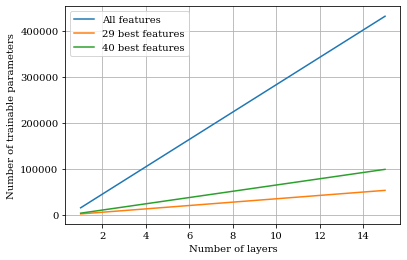

In [9]:
import matplotlib as mpl 
mpl.rcParams.update({"font.size": 12, "font.family": "serif"})
for i in range(len(depths_list)):
    x, y = zip(*sorted(list(zip(depths_list[i], sizes_list[i])), key=lambda x: x[0]))
    plt.plot(x, y,label=labels[i])
plt.xlabel('Number of layers')
plt.ylabel('Number of trainable parameters')
plt.legend()
plt.grid()

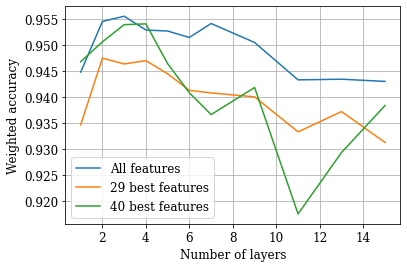

In [10]:
import matplotlib as mpl 
mpl.rcParams.update({"font.size": 12, "font.family": "serif"})
for i in range(len(depths_list)):
    x, y = zip(*sorted(list(zip(depths_list[i], weighted_accs_list[i])), key=lambda x: x[0]))
    plt.plot(x, y,label=labels[i])
plt.xlabel('Number of layers')
plt.ylabel('Weighted accuracy')
plt.legend()
plt.grid()
plt.savefig('Images/TEST9_global_v4_accuracy_vs_n_layers.pdf', bbox_inches='tight')

# Compare poisson significance estimator

In [22]:
from metrics import poisson_significance
import pandas as pd
from utils import plot_hist, isolate_int
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import fnmatch
import tensorflow as tf
from copy import deepcopy

In [23]:
path = 'saved_models/'
model_prefixes = ['TEST9_global_v4_all_channels_depth_', 'TEST9_sel1_depth_', 'TEST9_sel2_depth_']
labels = ['All features', '29 best features', '40 best features']
# val = pd.read_pickle('extracted_data/TEST9_global_v4_og_and_norm_weights_val')
val = pd.read_pickle('extracted_data/TEST9_v4_corrected_val')
# val = pd.read_pickle('extracted_data/TEST10_v4_val')
vars_list = []

with open('saved_results/features_and_label_all_v4', 'rb') as file:
        vars_all_v4 = pickle.load(file)
vars_list.append(vars_all_v4)

with open('saved_results/features_and_label_sel1', 'rb') as file:
        vars_sel1 = pickle.load(file)
vars_list.append(vars_sel1)

with open('saved_results/features_and_label_sel2', 'rb') as file:
        vars_sel2 = pickle.load(file)
vars_list.append(vars_sel2)

In [24]:
model_names_list = []
depths_list = []
for model_prefix in model_prefixes:
    model_names = fnmatch.filter(os.listdir(path), model_prefix+'*')
    model_names_list.append(model_names)
    depths = []
    for name in model_names:
        depth = isolate_int(name, separators='_')[0]
        depths.append(depth)
    depths_list.append(depths)

In [25]:
print(len(val[val['channel'] == 0]))

15750


100%|██████████| 100/100 [00:00<00:00, 895.46it/s]


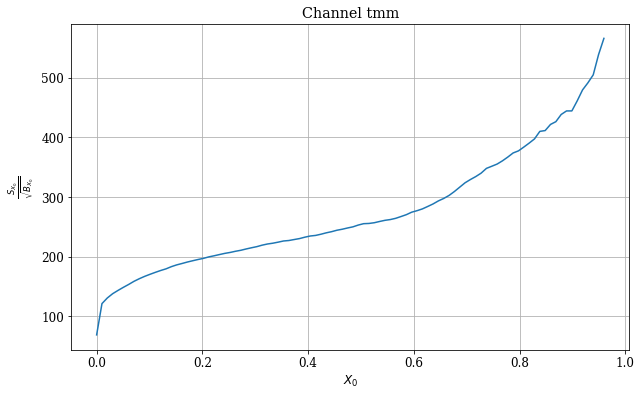

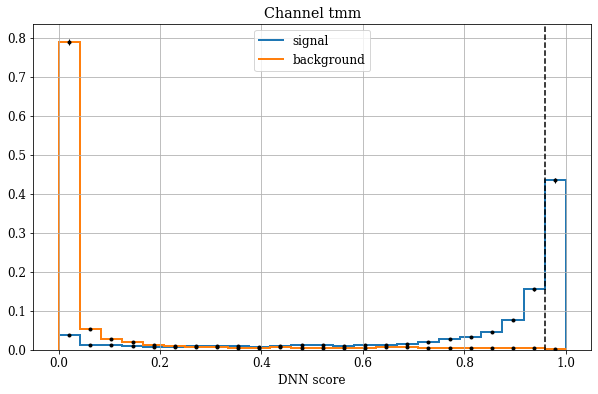

In [26]:
#Lists of results and plot with the same structure as the model_names_list:
#First index for the width of the DNN (either all features, or the selection)
#second index for the depth of the DNN
#third index for the channel
x0s_list = []
significances = []
sigs_plots = []
hists_plots = []

with open('extracted_data/TEST9_global_v4_all_normalized_channel_indices', 'rb') as file:
    channel_indices = pickle.load(file)

for i, model_names in enumerate(model_names_list):
    #Create the lists for the results for 1 width (and all depths)
    x0s_depth = []
    sigs_depth = []
    # sigs_plots_depth = []
    # hists_plots_depth = []

    for j, model_name in enumerate(model_names):
        model = tf.keras.models.load_model(path+model_name)

        #Create the lists for the results for 1 depths (and all channels)
        x0s_channel = []
        sigs_channel = []
        # sigs_plots_channel = []
        # hists_plots_channel = []

        for channel in channel_indices:
            val_channel = val[val['channel'] == channel_indices[channel]]
            x_val_channel = val_channel[vars_list[i]]
            label_val_channel = x_val_channel.pop('signal_label')
            scores = model.predict(x_val_channel)
            scores = np.squeeze(scores)

            sigs, bins = poisson_significance(scores, label_val_channel, val_channel['weightOriginal'], 100)
            
            sigs_channel.append(sigs)
            x0s_channel.append(bins)
            
            if not len(bins) == 0:
                threshold = bins[np.argmax(sigs)]
            else:
                threshold = np.NAN

            if i==0 and j==1 and channel=='tmm':
                #Plot of the significance as a function of the cut
                fig_s, ax_s = plt.subplots(1, 1, figsize=(10, 6))
                ax_s.plot(bins,sigs)
                ax_s.set_xlabel('$X_0$')
                ax_s.set_ylabel(r'$\frac{S_{X_0}}{\sqrt{B_{X_0}}}$')
                ax_s.set_title('Channel '+channel)
                ax_s.grid()
                sigs_plots.append(fig_s)

                #Plot of the histograms with optimal cut
                val_mod = deepcopy(val_channel)
                val_mod['scores'] = scores
                hist_bins = np.linspace(0,1,25)
                fig = plot_hist(val_mod, 'scores', 'DNN score', hist_bins, mode='simple_signal_label', weights_name='weightOriginal')[0]
                ax = fig.gca()
                if threshold == threshold:
                    ax.axvline(threshold, color='k', linestyle='--', label='$Optimal cut$')
                ax.set_title('Channel '+channel)
                hists_plots.append(fig)

        x0s_depth.append(x0s_channel)
        sigs_depth.append(sigs_channel)
        # sigs_plots_depth.append(sigs_plots_channel)
        # hists_plots_depth.append(hists_plots_channel)
    
    x0s_list.append(x0s_depth)
    significances.append(sigs_depth)
    # sigs_plots.append(sigs_plots_depth)
    # hists_plots.append(hists_plots_depth)

Try to plot [0][1][2] (all variables, 2nd depth, channel tmm)

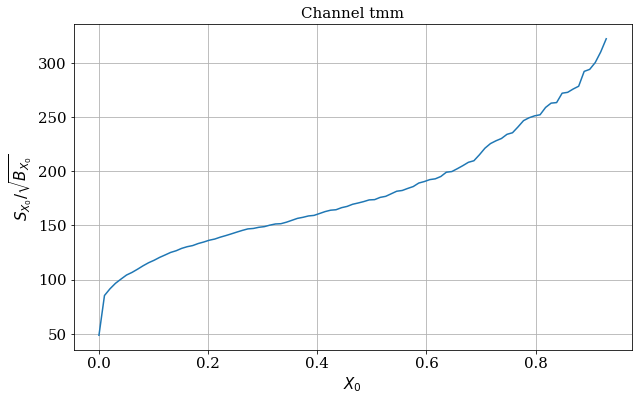

In [13]:
from IPython.display import display
import matplotlib as mpl
fig = sigs_plots[0]
ax = fig.gca()
ax.axis('on')
fig.patch.set_facecolor('white')
for text in fig.findobj(mpl.text.Text):
    text.set_fontsize(15)
    text.set_fontfamily('serif')
display(fig)

In [7]:
mpl.rcParams['text.usetex'] = False

NameError: name 'mpl' is not defined

In [14]:
print(labels)
labels_new = labels

['All features', '29 best features', '40 best features']


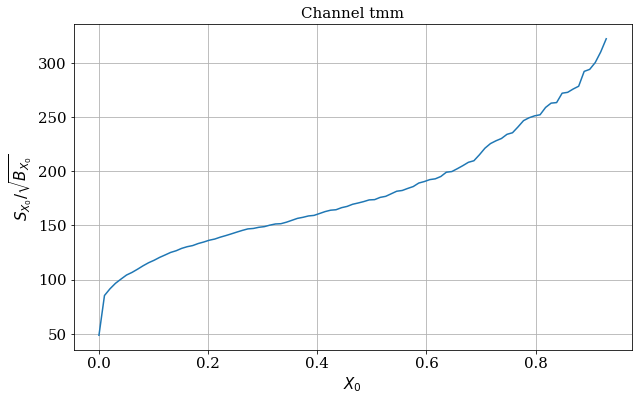

In [15]:
fig_s = sigs_plots[0]
ax = fig_s.gca()
ax.axis('on')
ax.set_ylabel(r'$S_{X_0}/\sqrt{B_{X_0}}$')
fig.patch.set_facecolor('white')
for text in fig_s.findobj(mpl.text.Text):
    text.set_fontsize(15)
    text.set_fontfamily('serif')
display(fig_s)

In [35]:
fig_s.savefig('Images/TEST9_global_v4_depth_3_channel_tmm_sig_X_0.pdf', bbox_inches = 'tight')

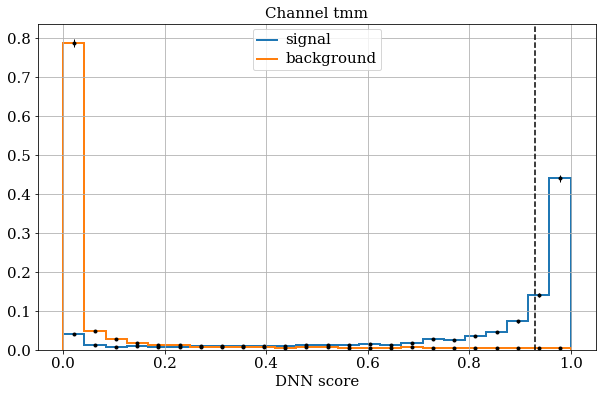

In [16]:
fig = hists_plots[0]
ax = fig.gca()
ax.axis('on')
fig.patch.set_facecolor('white')
for text in fig.findobj(mpl.text.Text):
    text.set_fontsize(15)
    text.set_fontfamily('serif')
display(fig)

In [27]:
fig.savefig('Images/TEST9_global_v4_depth_3_channel_tmm_DNN_score_hist.pdf', bbox_inches = 'tight')

In [27]:
with open('saved_results/TEST9_corrected_val_significance_by_width_depth_and_channel', 'wb') as file:
    pickle.dump(significances, file)

In [28]:
max_sigs_list = []
for sigs_width in significances:
    max_sigs_width = []
    for sigs_depth in sigs_width:
        sig_cmb = 0
        for sigs_channel in sigs_depth:
            if len(sigs_channel) != 0:
                sig_cmb += max(sigs_channel)**2
        sig_cmb = np.sqrt(sig_cmb)
        max_sigs_width.append(sig_cmb)
    max_sigs_list.append(max_sigs_width)

In [29]:
print(max_sigs_list)
print(depths_list)

[[1183.556226486807, 1361.1343758669284, 1185.863116067492, 1319.6931382021814, 1284.0110583393207, 1185.7201525266507, 1288.9600115685269, 1165.4859954129377, 1227.076487946606, 1341.4044635592975, 1162.8552224323762], [1300.4319191967497, 1396.058815307914, 1171.2326418224854, 1148.3395827313252, 1064.2553250288515, 1213.0655888545703, 1266.327702241213, 1220.8417538626193, 1258.2302540826104, 1175.7471667082355, 1189.219698506817], [1214.6524384672173, 1239.741807158364, 1140.4982504585212, 1070.287139544493, 1170.195877535419, 1270.7762609294502, 1379.1170876874478, 1248.4428072463606, 1234.3652699846216, 1231.6710485521069, 1270.203226434036]]
[[6, 3, 13, 7, 5, 11, 4, 2, 15, 1, 9], [5, 1, 13, 15, 6, 11, 4, 7, 2, 9, 3], [13, 4, 15, 3, 5, 7, 11, 6, 9, 2, 1]]


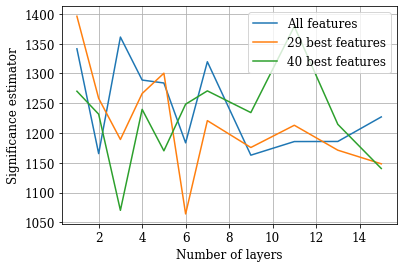

In [30]:
import matplotlib as mpl 
mpl.rcParams.update({"font.size": 12, "font.family": "serif"})
for i in range(len(depths_list)):
    x, y = zip(*sorted(list(zip(depths_list[i], max_sigs_list[i])), key=lambda x: x[0]))
    plt.plot(x, y,label=labels[i])
plt.xlabel('Number of layers')
plt.ylabel('Significance estimator')
plt.legend()
plt.grid()
plt.savefig('Images/TEST9_global_v4_sig_vs_n_layers.pdf', bbox_inches = 'tight')

# Simple score histograms

In [1]:
import pandas as pd
import os
import fnmatch
import numpy as np
from utils import isolate_int, normalize, plot_hist
import pickle
import tensorflow as tf
from copy import deepcopy
import matplotlib as mpl

In [2]:
depth = 3
model = tf.keras.models.load_model(f'saved_models/TEST9_sel2_depth_{depth}')

2023-06-02 17:28:35.693024: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 17:28:36.777894: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6673 MB memory:  -> device: 0, name: Quadro RTX 4000, pci bus id: 0000:17:00.0, compute capability: 7.5
2023-06-02 17:28:36.779134: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6654 MB memory:  -> device: 1, name: Quadro RTX 4000, pci bus id: 0000:65:00.0, compute capability: 7.5


In [3]:
with open('extracted_data/TEST9_global_v4_all_normalized_channel_indices', 'rb') as file:
    channel_indices = pickle.load(file)

In [19]:
channels = os.listdir('/data/hnl/prompt_tau/anatuple/nanoV10/TEST9/')
mass_hyps = []
file_list = fnmatch.filter(os.listdir(f'/data/hnl/prompt_tau/anatuple/nanoV10/TEST9/{list(channel_indices.keys())[0]}/anatuple'), '*.root')
for filename in file_list:
    if filename[:len('HNL')] == 'HNL':
            mass_hyps.append(isolate_int(filename, separators=['-', '_'])[0])
mass_hyps = np.unique(np.array(mass_hyps))
print(channels)
print(mass_hyps)

['tte', 'tee', 'tmm', 'tem', 'ttm']
[  85  100  125  150  200  250  300  350  400  450  500  600  700  800
  900 1000]


In [20]:
with open('saved_results/features_and_label_sel2', 'rb') as file:
    features = pickle.load(file)

In [21]:
test = pd.read_pickle('extracted_data/TEST9_global_v4_og_and_norm_weights_test')

In [24]:
channel = channels[4]
mass_hyp = mass_hyps[-1]

test_loc = deepcopy(test.loc[(test['channel']==channel_indices[channel]) & 
                    ((test['mass_hyp'] == mass_hyp) | (test['signal_label']==0))])

test_loc = normalize(test_loc, 'signal_label', len(test_loc['event']), 'weightOriginal')


x_test = test_loc[features]
label_test = x_test.pop('signal_label')

In [25]:
results = model.evaluate(x_test, label_test, sample_weight=test_loc['weightOriginal'])
scores = model.predict(x_test)
test_loc['scores'] = scores

1600/1600 [==============================] - 6s 3ms/step - loss: 1.5737 - accuracy: 0.3791 - weighted_accuracy: 0.6828


In [52]:
print(len(scores))

51194


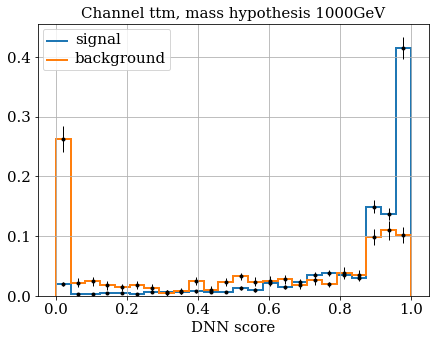

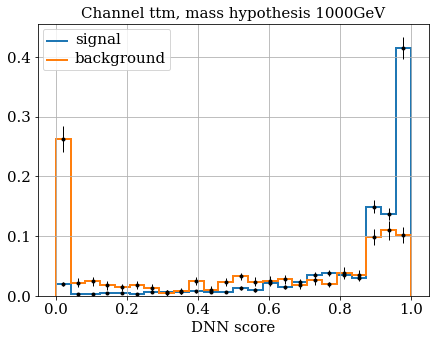

In [53]:
bins = np.linspace(0,1,25)
fig = plot_hist(test_loc, 'scores', 'DNN score', bins, mode='simple_signal_label', weights_name='weightNorm', figsize=(7,5))[0]
ax = fig.gca()
# ax.legend(loc='upper left')
ax.axis('on')
ax.set_title('Channel {}, mass hypothesis {}GeV'.format(channel, mass_hyp))
fig.patch.set_facecolor('white')
for text in fig.findobj(mpl.text.Text):
    text.set_fontsize(15)
    text.set_fontfamily('serif')
display(fig)

In [140]:
fig.savefig('Images/download/TEST9_sel2_depth_{}_score_hist_{}_{}.pdf'.format(depth, mass_hyp, channel), bbox_inches = 'tight')

In [54]:
print(channel)
print(results)

ttm
[1.5737197399139404, 0.3791459798812866, 0.6828303933143616]


# Significance comparison DNN vs best variable

### Data and variable loading

In [1]:
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import fnmatch
from utils import isolate_int, plot_hist
from metrics import poisson_significance
from copy import deepcopy
from IPython.display import display
from matplotlib.ticker import ScalarFormatter

In [2]:
with open('extracted_data/variable_symbols', 'rb') as file:
    variable_symbols = pickle.load(file)

In [3]:
depth = 3
model = tf.keras.models.load_model(f'saved_models/TEST9_sel2_depth_{depth}')

2023-06-04 16:06:14.975361: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-04 16:06:15.856085: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6673 MB memory:  -> device: 0, name: Quadro RTX 4000, pci bus id: 0000:17:00.0, compute capability: 7.5
2023-06-04 16:06:15.856917: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6654 MB memory:  -> device: 1, name: Quadro RTX 4000, pci bus id: 0000:65:00.0, compute capability: 7.5


In [4]:
with open('extracted_data/TEST9_global_v4_all_normalized_channel_indices', 'rb') as file:
    channel_indices = pickle.load(file)

In [5]:
channels = os.listdir('/data/hnl/prompt_tau/anatuple/nanoV10/TEST10/')
channels.remove('tmm_old')
mass_hyps = []
file_list = fnmatch.filter(os.listdir(f'/data/hnl/prompt_tau/anatuple/nanoV10/TEST10/{list(channel_indices.keys())[0]}/anatuple'), '*.root')
for filename in file_list:
    if filename[:len('HNL')] == 'HNL':
            mass_hyps.append(isolate_int(filename, separators=['-', '_'])[0])
mass_hyps = np.unique(np.array(mass_hyps))
print(channels)
print(mass_hyps)

['tte', 'tee', 'tmm', 'tem', 'ttm']
[  85  100  125  150  200  250  300  350  400  450  500  600  700  800
  900 1000]


In [6]:
with open('saved_results/features_and_label_sel2', 'rb') as file:
    features = pickle.load(file)

In [7]:
test = pd.read_pickle('extracted_data/TEST10_v4_test')
meas = pd.read_pickle('extracted_data/TEST10_v4_meas')
df_eval = pd.concat([test, meas]).reset_index(drop=True)
# df_eval = test

### Computations

In [35]:
def compute_DNN_var_sigs(df, model, vars, var_names, features):
    if type(vars) != list:
        vars = [vars]
        var_names = [var_names]

    x_sp = df[features]
    _ = x_sp.pop('signal_label')
    scores = model.predict(x_sp)
    scores = np.squeeze(scores)
    
    results = {}
    for i,var in enumerate(vars):
        sigs_var, bins_var = poisson_significance(df[var], df['signal_label'], df['weightOriginal'], 1000)
        results['sigs_'+var_names[i]] = sigs_var
        results['bins_'+var_names[i]] = bins_var
    sigs_score, bins_score = poisson_significance(scores, df['signal_label'], df['weightOriginal'], 200)
    results['scores'] = scores
    results['sigs_score'] = sigs_score
    results['bins_score'] = bins_score

    return results


In [92]:
print(channels)

['tte', 'tee', 'tmm', 'tem', 'ttm']


In [94]:
# best_var = 'HNL_CM_mass_1'
best_var = 'Mt_tot'
channel = channels[2]
mass_hyp = mass_hyps[-1]

df_sp = deepcopy(df_eval.loc[(df_eval['channel']==channel_indices[channel]) & 
                ((df_eval['mass_hyp'] == mass_hyp) | (df_eval['signal_label']==0))])

df_sp.loc[df_sp['signal_label'] == 0, 'mass_hyp'] = mass_hyp

results = compute_DNN_var_sigs(df_sp, model, best_var, 'var',  features)

100%|██████████| 200/200 [00:00<00:00, 1471.94it/s]


In [95]:
if len(results['sigs_var']) != 0:
    sig_var = np.max(results['sigs_var'])
    cut_var = results['bins_var'][np.argmax(results['sigs_var'])]
else:
    sig_var = 0
    cut_var = np.NAN
if len(results['sigs_score']) != 0:
    sig_score = np.max(results['sigs_score'])
    cut_score = results['bins_score'][np.argmax(results['sigs_score'])]
else:
    sig_score = 0
    cut_score = np.NAN

In [96]:
title = f'Channel {channel}, mass hypothesis {mass_hyp}GeV'

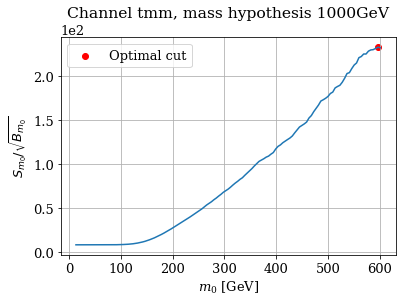

In [98]:
import matplotlib as mpl 
mpl.rcParams.update({"font.size": 13, "font.family": "serif"})
plt.plot(results['bins_var'], results['sigs_var'])
plt.scatter(cut_var, sig_var, c='r', label='Optimal cut')
plt.ticklabel_format(style='sci', axis='y', scilimits=(1,-1))
plt.xlabel('$m_0$ [GeV]', math_fontfamily = 'dejavuserif')
plt.ylabel('$S_{m_0}/\sqrt{B_{m_0}}$')
plt.grid()
plt.legend()
plt.title(title, pad=20)
plt.savefig('Images/download/TEST10_' + best_var + f'_sig_vs_cut_{mass_hyp}_' + channel + '.pdf', bbox_inches='tight')

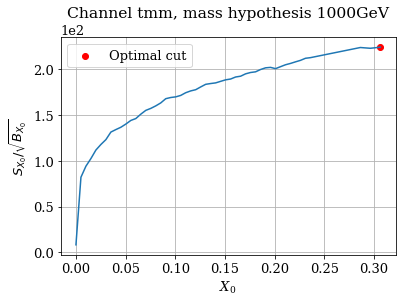

In [100]:
plt.plot(results['bins_score'], results['sigs_score'])
plt.scatter(cut_score, sig_score, c='r', label='Optimal cut')
plt.ticklabel_format(style='sci', axis='y', scilimits=(1,-1))
plt.xlabel('$X_0$', math_fontfamily = 'dejavuserif')
plt.ylabel('$S_{X_0}/\sqrt{B_{X_0}}$')
plt.grid()
plt.legend()
plt.title(title, pad=20)
plt.savefig(f'Images/download/TEST10_sel2_depth_{depth}_score_sig_vs_cut_{mass_hyp}_' + channel + '.pdf', bbox_inches='tight')

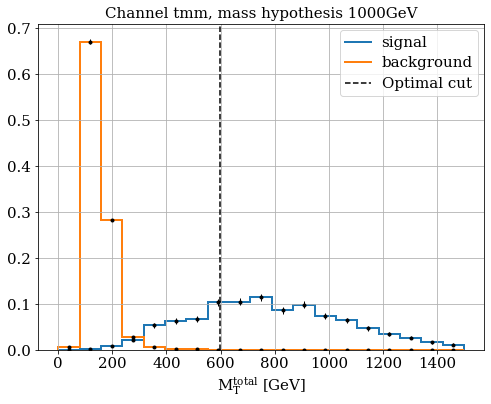

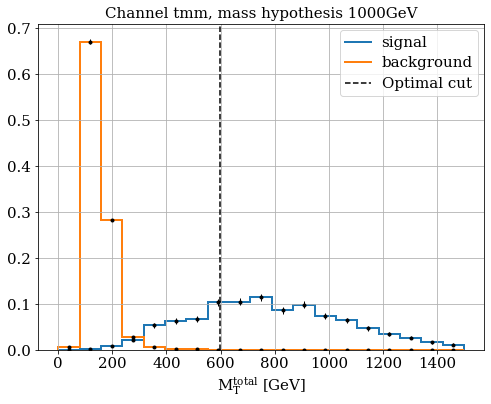

In [105]:
bins = np.linspace(0, 1500, 20)
fig = plot_hist(df_sp, best_var, variable_symbols[best_var]+' [GeV]', bins, mode='simple_signal_label', 
                return_counts=False, weights_name='weightOriginal', figsize=(8,6))[0]
ax = fig.axes[0]
y_min, y_max = ax.get_ylim()
if cut_var==cut_var:
    ax.axvline(cut_var, color='k', linestyle='--', label='Optimal cut')
ax.legend()
ax.set_title(title)
fig.patch.set_facecolor('white')
for text in fig.findobj(mpl.text.Text):
    text.set_fontsize(15)
    text.set_fontfamily('serif')
    text.set_math_fontfamily('dejavuserif')
display(fig)

In [106]:
fig.savefig('Images/download/TEST10_' + best_var + f'_hist_opt_cut_{mass_hyp}_' + channel + '.pdf', bbox_inches='tight')

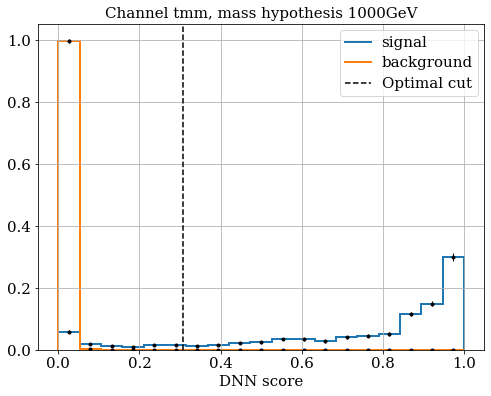

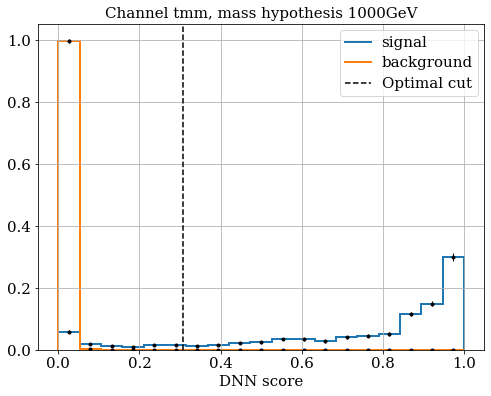

In [107]:
bins = np.linspace(0,1, 20)
df_sp['scores'] = results['scores']
fig = plot_hist(df_sp, 'scores', 'DNN score', bins, mode='simple_signal_label', return_counts=False, 
                weights_name='weightOriginal', figsize=(8,6))[0]
ax = fig.axes[0]
y_min, y_max = ax.get_ylim()
if cut_score==cut_score:
    ax.axvline(cut_score, color='k', linestyle='--', label='Optimal cut')
ax.legend()
ax.set_title(title)
fig.patch.set_facecolor('white')
for text in fig.findobj(mpl.text.Text):
    text.set_fontsize(15)
    text.set_fontfamily('serif')
display(fig)

In [108]:
fig.savefig(f'Images/download/TEST10_sel2_depth_3_score_hist_{mass_hyp}_' + channel + '.pdf', bbox_inches='tight')

### Computation of the significance for all signal points

In [42]:
best_var = 'HNL_CM_mass_1'
ref_var = 'Mt_tot'

In [43]:
data_types = ['DNN', 'best_var', 'ref_var']

In [44]:
significances = {data_type: {mass_hyp: {channel: None for channel in channels} for mass_hyp in mass_hyps} for data_type in data_types}

In [45]:
for channel in channels:
    for mass_hyp in mass_hyps:
        df_sp = deepcopy(df_eval.loc[(df_eval['channel']==channel_indices[channel]) & 
                ((df_eval['mass_hyp'] == mass_hyp) | (df_eval['signal_label']==0))])
        df_sp.loc[df_sp['signal_label'] == 0, 'mass_hyp'] = mass_hyp
        results = compute_DNN_var_sigs(df_sp, model, [best_var, ref_var], data_types[1:], features)
        
        significances['DNN'][mass_hyp][channel] = np.max(results['sigs_score'])
        
        for var in data_types[1:]:
            significances[var][mass_hyp][channel] = np.max(results['sigs_'+var])

100%|██████████| 200/200 [00:00<00:00, 1802.77it/s]


In [46]:
for data_type in data_types:
    for mass_hyp in mass_hyps:
        sig_cmb = 0
        for channel in channels:
            sig_cmb += significances[data_type][mass_hyp][channel]**2
        significances[data_type][mass_hyp]['combined'] = np.sqrt(sig_cmb)

In [47]:
with open('saved_results/significance_DNN_vs_best_var', 'wb') as file:
    pickle.dump(significances, file)

In [48]:
with open('saved_results/significance_DNN_vs_best_var', 'rb') as file:
    significances = pickle.load(file)

In [49]:
labels = ['DNN', variable_symbols[best_var], variable_symbols[ref_var]]

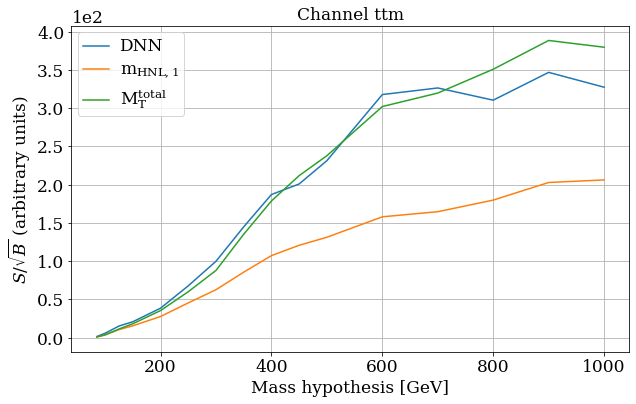

In [88]:
import matplotlib as mpl 
mpl.rcParams.update({"font.size": 13, "font.family": "serif"})
channel = channels[4]

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for i, data_type in enumerate(data_types):
    sigs = [significances[data_type][mass_hyp][channel] for mass_hyp in mass_hyps]
    ax.plot(mass_hyps, sigs, label=labels[i])

ax.set_title('Channel ' + channel)
ax.ticklabel_format(style='sci', axis='y', scilimits=(1,-1))
ax.set_xlabel('Mass hypothesis [GeV]')
ax.set_ylabel('$S/\sqrt{B}$ (arbitrary units)', math_fontfamily='dejavuserif')
# ax.set_yscale('log')

legend = ax.legend()
legend.texts[1].set_math_fontfamily('dejavuserif')
ax.grid()
fig.patch.set_facecolor('white')
for text in fig.findobj(mpl.text.Text):
    text.set_fontsize(17)
    text.set_fontfamily('serif')
    text.set_math_fontfamily('dejavuserif')

fig.savefig(f'Images/download/significance_DNN_vs_mHNL_Mtot_{channel}.pdf', bbox_inches='tight')

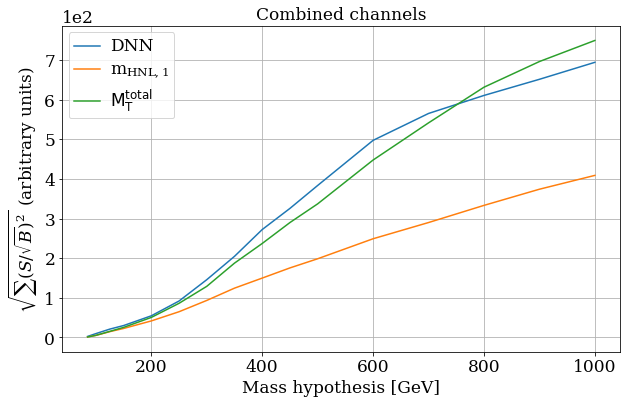

In [91]:
import matplotlib as mpl 
log = False

mpl.rcParams.update({"font.size": 13, "font.family": "serif"})

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for i, data_type in enumerate(data_types):
    sigs = [significances[data_type][mass_hyp]['combined'] for mass_hyp in mass_hyps]
    ax.plot(mass_hyps, sigs, label=labels[i])

ax.set_title('Combined channels')
ax.ticklabel_format(style='sci', axis='y', scilimits=(1,-1))
ax.set_xlabel('Mass hypothesis [GeV]')
ax.set_ylabel('$\sqrt{\sum(S/\sqrt{B})^2}$ (arbitrary units)', math_fontfamily='dejavuserif')

if log:
    ax.set_yscale('log')

legend = ax.legend()
legend.texts[1].set_math_fontfamily('dejavuserif')
ax.grid()
fig.patch.set_facecolor('white')
for text in fig.findobj(mpl.text.Text):
    text.set_fontsize(17)
    text.set_fontfamily('serif')

if log:
    fig.savefig(f'Images/download/significance_DNN_vs_mHNL_Mtot_cmb_log.pdf')
else:
    fig.savefig(f'Images/download/significance_DNN_vs_mHNL_Mtot_cmb.pdf')

In [57]:
adf = tf.keras.models.load_model('saved_models/TEST9_global_v4_all_channels_depth_3')
adf.summary()

Model: "dnn_tau"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  15136     
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_1 (Dense)             multiple                  29756     
                                                                 
 dropout_1 (Dropout)         multiple                  0         
                                                                 
 dense_2 (Dense)             multiple                  29756     
                                                                 
 dropout_2 (Dropout)         multiple                  0         
                                                                 
 dense_3 (Dense)             multiple                  173 